In [15]:
import h5py
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
file_path = 'data/bitcoin2018_close.h5'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found at: {file_path}")

with h5py.File(file_path, 'r') as hf:
    datas = hf['inputs'][:]
    labels = hf['outputs'][:]
    input_times = hf['input_times'][:]
    output_times = hf['output_times'][:]
    original_inputs = hf['original_inputs'][:]
    original_outputs = hf['original_outputs'][:]
    original_datas = hf['original_datas'][:]



In [17]:
training_size = int(0.8 * datas.shape[0])
training_datas = datas[:training_size, :, :]
training_labels = labels[:training_size, :, 0]
validation_datas = datas[training_size:, :, :]
validation_labels = labels[training_size:, :, 0]

validation_original_outputs = original_outputs[training_size:, :, :]
validation_original_inputs = original_inputs[training_size:, :, :]
validation_input_times = input_times[training_size:, :, :]
validation_output_times = output_times[training_size:, :, :]

In [18]:
scaler = MinMaxScaler()
ground_true = np.append(validation_original_inputs, validation_original_outputs, axis=1)
ground_true_times = np.append(validation_input_times, validation_output_times, axis=1)


In [19]:
predicted = np.zeros(validation_labels.shape)
for i in range(16):
    lr = LinearRegression()
    lr.fit(training_datas[:, :, 0], training_labels[:, i])
    predicted[:, i] = lr.predict(validation_datas[:, :, 0])

In [20]:
scaler.fit(original_datas[:, 0].reshape(-1, 1))
predicted_inverted = scaler.inverse_transform(predicted)

In [21]:
# Flatten predicted values and corresponding times
predicted_inverted = predicted_inverted.reshape(-1)
validation_output_times = pd.to_datetime(validation_output_times.reshape(-1), unit='s')

In [22]:
# Flatten and inverse-transform ground truth values and times
ground_true = ground_true[:, :, 0].reshape(-1)
ground_true_times = pd.to_datetime(ground_true_times.reshape(-1), unit='s')
ground_true = scaler.inverse_transform(ground_true.reshape(-1, 1)).reshape(-1)

In [23]:
ground_true_df = pd.DataFrame({'times': ground_true_times, 'value': ground_true})
prediction_df = pd.DataFrame({'times': validation_output_times, 'value': predicted_inverted})

In [24]:
print(ground_true_df['times'].min(), ground_true_df['times'].max())
print(prediction_df['times'].min(), prediction_df['times'].max())

2020-05-27 02:50:00 2021-01-01 15:05:00
2020-05-28 00:10:00 2021-01-01 15:05:00


In [25]:
print("Ground Truth Times Range:", ground_true_df["times"].min(), "to", ground_true_df["times"].max())
print("Prediction Times Range:", prediction_df["times"].min(), "to", prediction_df["times"].max())

Ground Truth Times Range: 2020-05-27 02:50:00 to 2021-01-01 15:05:00
Prediction Times Range: 2020-05-28 00:10:00 to 2021-01-01 15:05:00


In [26]:
ground_true_df = ground_true_df.loc[
    (ground_true_df["times"].dt.year == 2018) & (ground_true_df["times"].dt.month > 7)
]
prediction_df = prediction_df.loc[
    (prediction_df["times"].dt.year == 2018) & (prediction_df["times"].dt.month > 7)
]

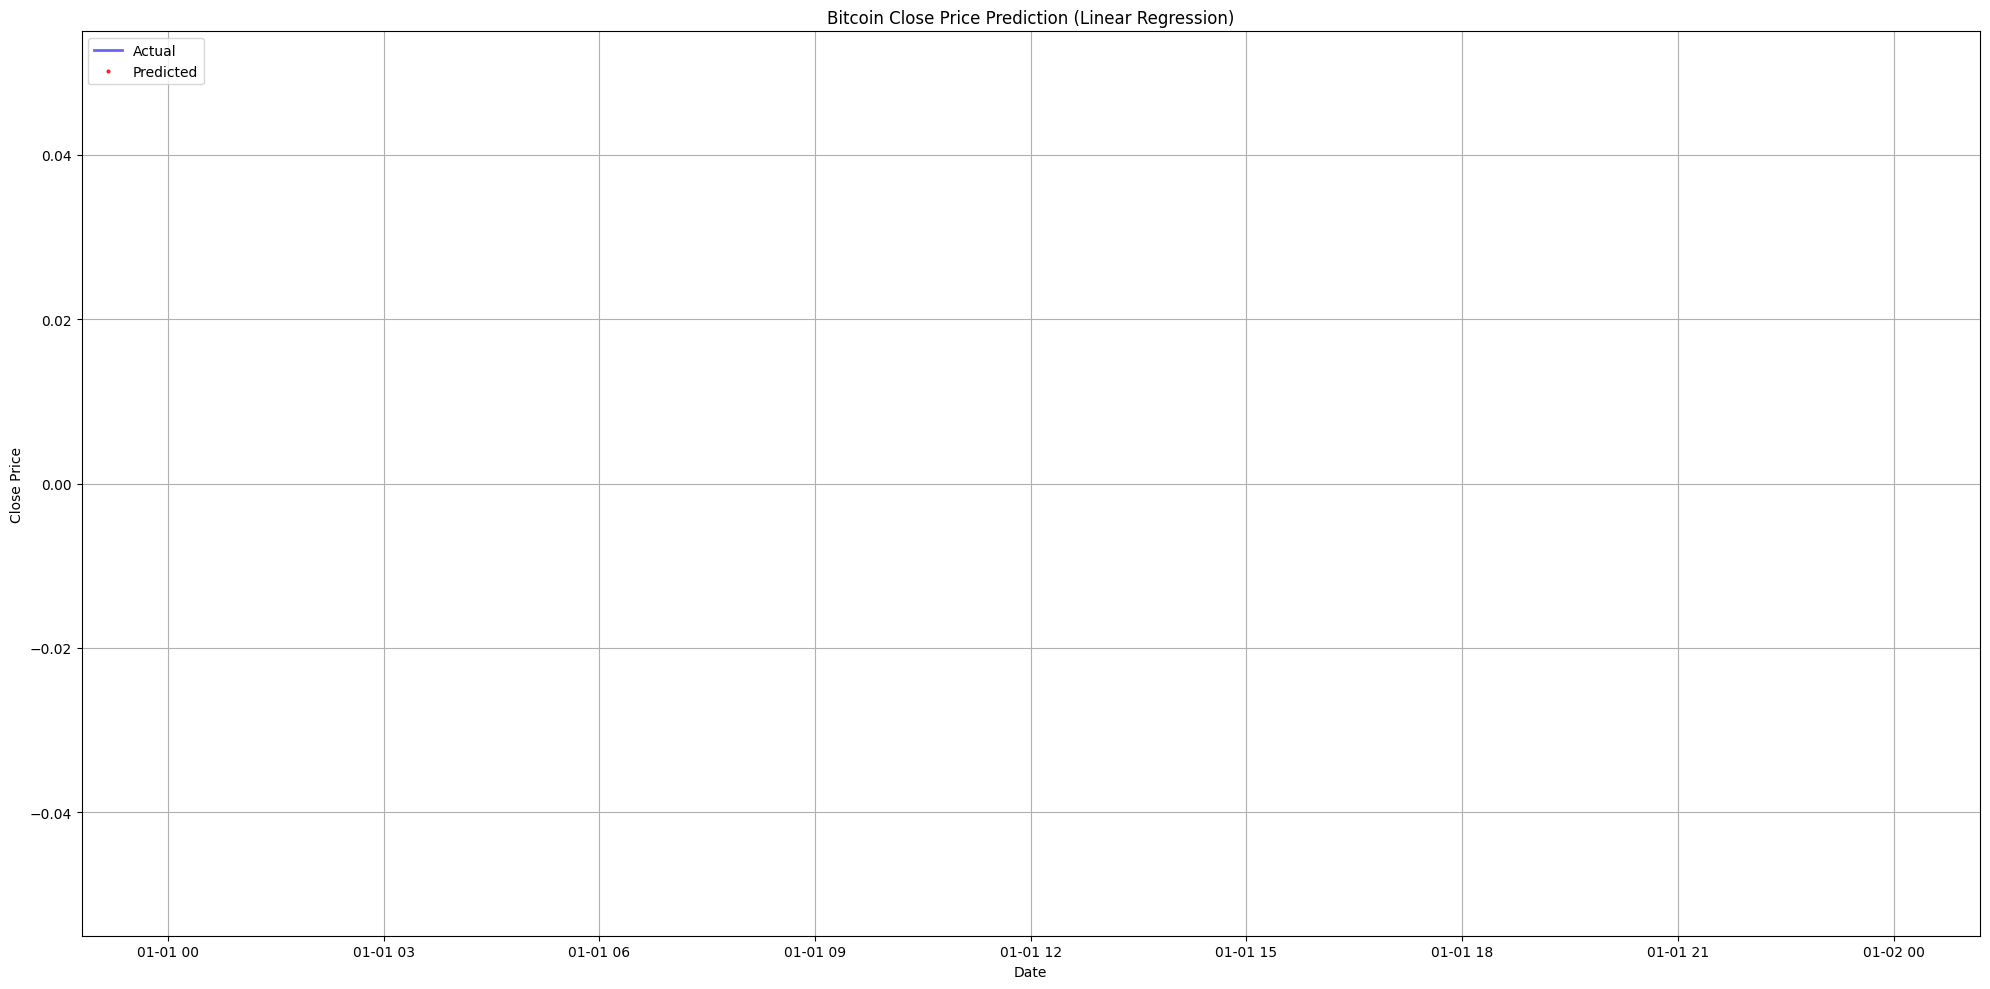

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(ground_true_df.times, ground_true_df.value, label='Actual', color='blue', alpha=0.6, linewidth=2)
plt.plot(prediction_df.times, prediction_df.value, 'ro', label='Predicted', markersize=2, alpha=0.8)
plt.title("Bitcoin Close Price Prediction (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

In [28]:
# Save and show plot
os.makedirs('result', exist_ok=True)
plt.savefig('result/bitcoin2018_close_lr.png')
plt.show()

# -----------------------------
# Evaluation
# -----------------------------
mse = mean_squared_error(validation_original_outputs[:, :, 0].reshape(-1), predicted_inverted)
print("Mean Squared Error:", mse)

<Figure size 640x480 with 0 Axes>

Mean Squared Error: 10368.953082250708


Shapes → (314539, 1) (314539,) 314539


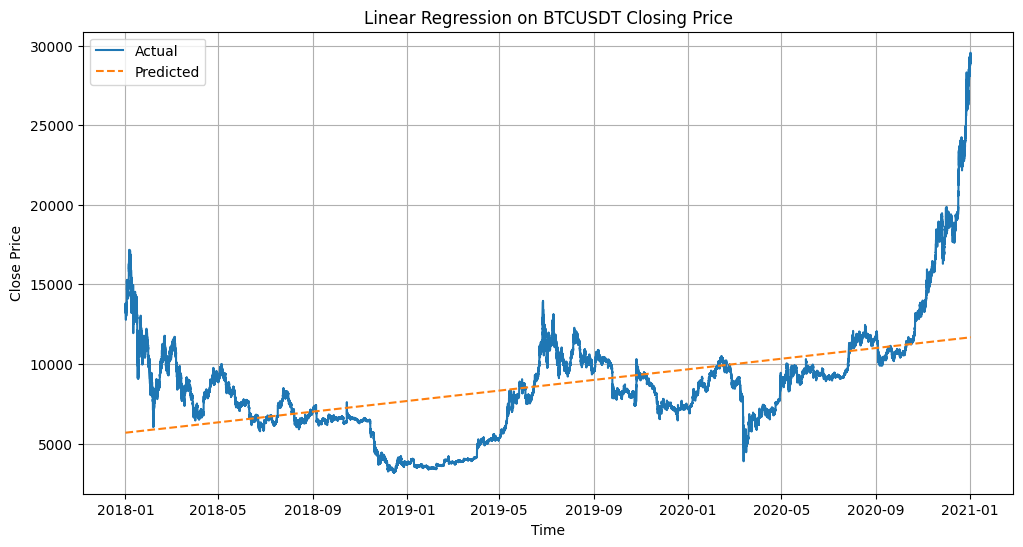

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load CSV
df = pd.read_csv("data/BTCUSDT_2018.csv")

# Convert 'Open Time' to datetime
df['Open Time'] = pd.to_datetime(df['Open Time'])

# Use only 'Close' prices
df = df[['Open Time', 'Close']].dropna()

# Build time series variables
time_stamps = df['Open Time']
y = df['Close'].values
X = np.arange(len(df)).reshape(-1, 1)

# Train Linear Regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# ✅ Debug print to verify
print("Shapes →", X.shape, y.shape, len(time_stamps))  # All should match

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time_stamps, y, label="Actual")
plt.plot(time_stamps, y_pred, label="Predicted", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.title("Linear Regression on BTCUSDT Closing Price")
plt.legend()
plt.grid(True)
plt.show()


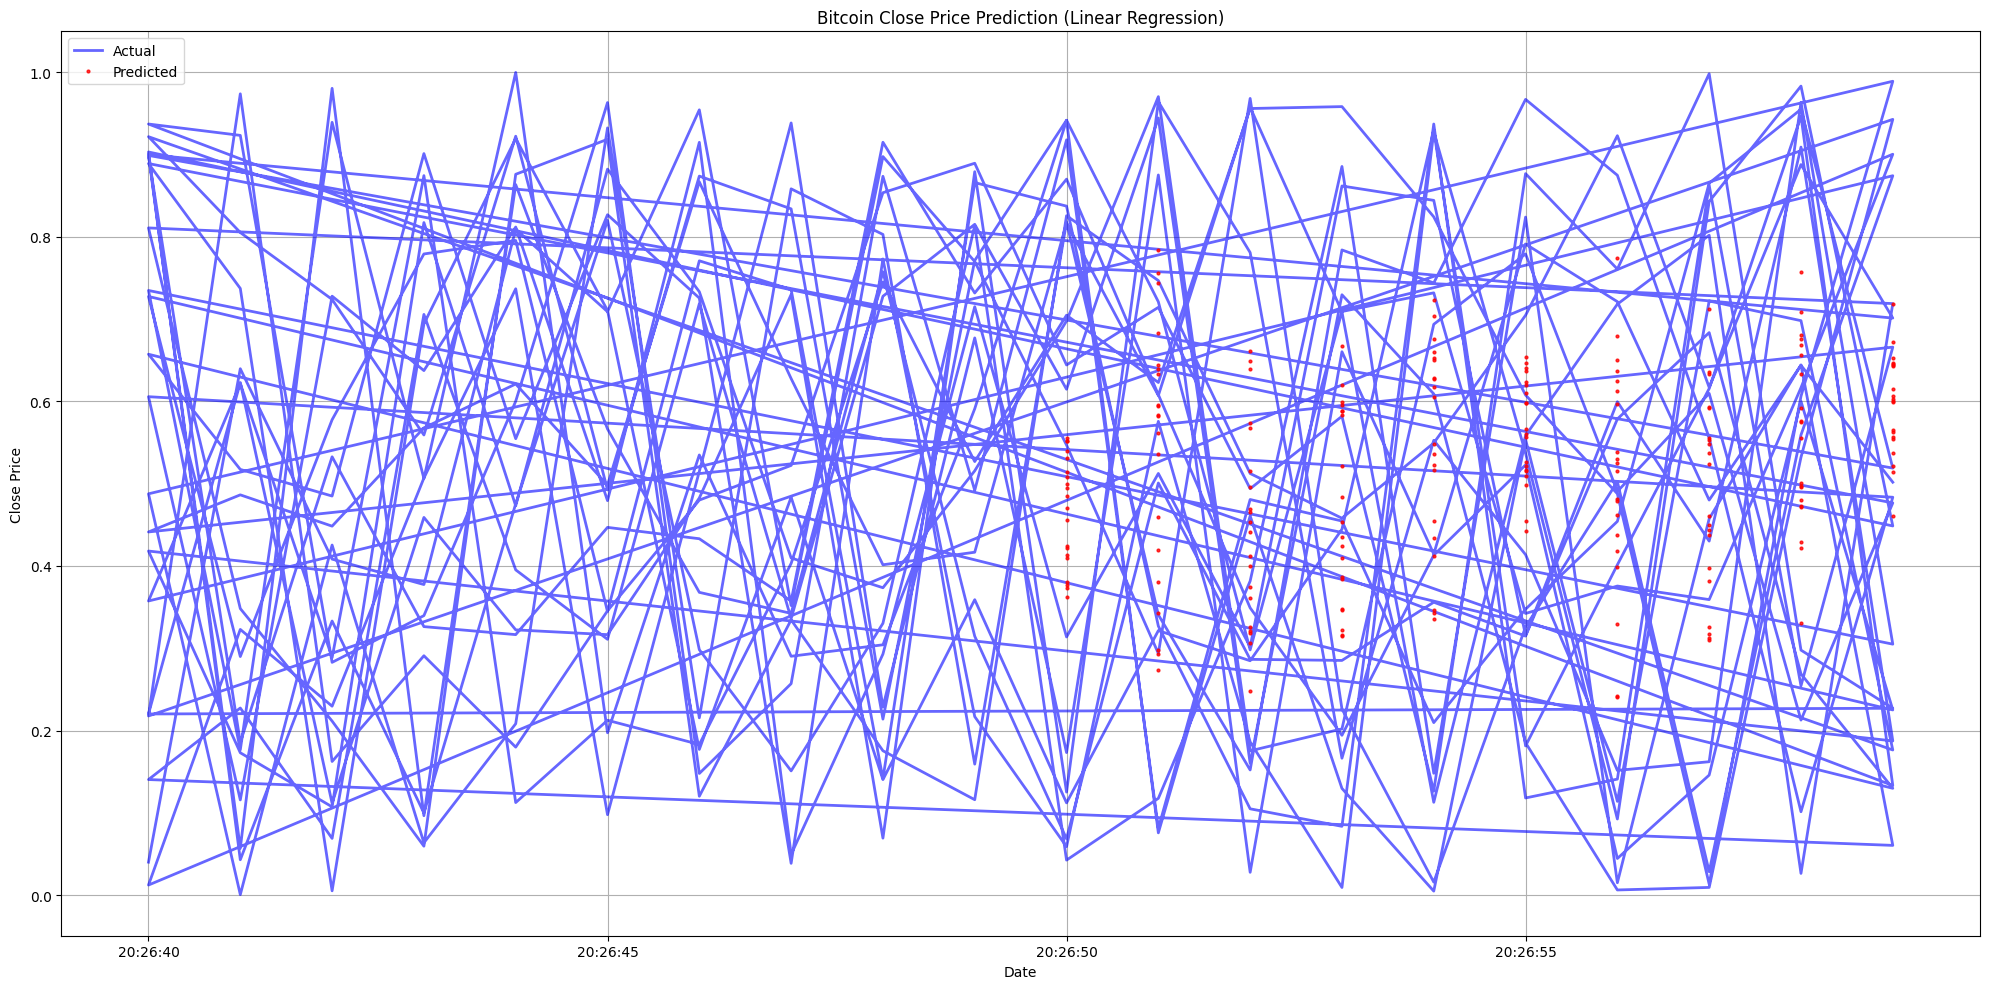

In [ ]:
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Simulate the expected structure for debugging since actual .h5 file access isn't available
# Create dummy data to replicate the structure of the .h5 dataset

# Constants
samples = 100
timesteps = 10
features = 1

# Simulated data
np.random.seed(0)
datas = np.random.rand(samples, timesteps, features)
labels = np.random.rand(samples, timesteps, features)
input_times = np.tile(np.arange(1_510_000_000, 1_510_000_000 + timesteps), (samples, 1)).reshape(samples, timesteps, 1)
output_times = np.tile(np.arange(1_510_000_000 + timesteps, 1_510_000_000 + 2 * timesteps), (samples, 1)).reshape(samples, timesteps, 1)
original_inputs = datas.copy()
original_outputs = labels.copy()
original_datas = np.random.rand(samples * timesteps, features)

# Split into train and validation
training_size = int(0.8 * datas.shape[0])
training_datas = datas[:training_size, :, :]
training_labels = labels[:training_size, :, 0]
validation_datas = datas[training_size:, :, :]
validation_labels = labels[training_size:, :, 0]

# Also slice corresponding time/value arrays
validation_original_outputs = original_outputs[training_size:, :, :]
validation_original_inputs = original_inputs[training_size:, :, :]
validation_input_times = input_times[training_size:, :, :]
validation_output_times = output_times[training_size:, :, :]

# Prepare inverse scaling
scaler = MinMaxScaler()
ground_true = np.append(validation_original_inputs, validation_original_outputs, axis=1)
ground_true_times = np.append(validation_input_times, validation_output_times, axis=1)
predicted = np.zeros(validation_labels.shape)

# Train and predict for each step
for i in range(validation_labels.shape[1]):
    lr = LinearRegression()
    lr.fit(training_datas[:, :, 0], training_labels[:, i])
    predicted[:, i] = lr.predict(validation_datas[:, :, 0])

# Invert scaling of predictions
scaler.fit(original_datas[:, 0].reshape(-1, 1))
predicted_inverted = scaler.inverse_transform(predicted).reshape(-1)

# Flatten times and actual values
validation_output_times = pd.to_datetime(output_times[training_size:, :, :].reshape(-1).astype(np.int64), unit='s')
ground_true_flat = ground_true[:, :, 0].reshape(-1)
ground_true_times = pd.to_datetime(ground_true_times.reshape(-1).astype(np.int64), unit='s')
ground_true_flat = scaler.inverse_transform(ground_true_flat.reshape(-1, 1)).reshape(-1)

# Sort values by time
ground_true_df = ground_true_df.sort_values("times")
prediction_df = prediction_df.sort_values("times")

# Optional: Limit to first 1000 points for readability
ground_true_df = ground_true_df.iloc[:1000]
prediction_df = prediction_df.iloc[:1000]

# Optional: Group by timestamp to handle duplicate times (average prediction)
prediction_df = prediction_df.groupby('times').mean().reset_index()

# Final Clean Plot
plt.figure(figsize=(14, 7))
plt.plot(ground_true_df.times, ground_true_df.value, label='Actual', color='blue', linewidth=2, alpha=0.7)
plt.plot(prediction_df.times, prediction_df.value, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.title("Bitcoin Close Price Prediction (Linear Regression)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
